In [1]:
import pandas as pd
import numpy as np

from scipy.stats import normaltest
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

# 1 Import data

In [5]:
train = pd.read_csv(r'C:\Users\Yevhen\Desktop\pet_prog\data\car_price_train.csv')

1.region - the state in which the ad is posted

2.year - the year the vehicle was manufactured

3.maker - manufacturer concern

4.model - car model

5.condition - technical condition of the vehicle

6.cylinders - number of cylinders in the engine

7.fuel - type of fuel

8.odometer - mileage

9.title_status - vehicle status

10.transmission - type of transmission

11.drive - drive type

12.size - characteristic of the size of the car

13.type - body type

14.paint_color - car color

15.state - state of sale

In [6]:
test = pd.read_csv(r'C:\Users\Yevhen\Desktop\pet_prog\data\car_price_test.csv')

In [7]:
train.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,target
0,portland,2012.0,ford,f-150,NaN,6 cylinders,gas,108410.0,clean,automatic,rwd,NaN,truck,white,or,17995
1,boise,2011.0,lexus,rx350 awd,like new,6 cylinders,gas,146234.0,clean,automatic,4wd,NaN,SUV,white,id,14995
2,milwaukee,2012.0,volkswagen,jetta,good,4 cylinders,diesel,110000.0,clean,manual,fwd,compact,wagon,black,wi,5000
3,fresno,2002.0,ford,f-550 super duty,good,10 cylinders,gas,147848.0,rebuilt,automatic,rwd,full-size,truck,white,ca,16500
4,spokane,2017.0,ram,1500,NaN,NaN,gas,80732.0,clean,automatic,4wd,NaN,pickup,blue,id,30999


In [8]:
test.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,id
0,salem,2019.0,toyota,tacoma,NaN,NaN,gas,46895.0,clean,automatic,4wd,NaN,pickup,white,or,0
1,orlando,2014.0,ford,mustang,NaN,NaN,gas,128910.0,clean,automatic,NaN,NaN,convertible,white,fl,1
2,boston,2002.0,bmw,x5,good,8 cylinders,gas,197000.0,clean,automatic,4wd,full-size,SUV,grey,ma,2
3,kennewick-pasco-richland,2006.0,ford,explorer,fair,NaN,gas,220000.0,clean,automatic,NaN,full-size,SUV,silver,wa,3
4,columbus,2013.0,subaru,legacy premium awd,like new,4 cylinders,gas,87000.0,clean,automatic,4wd,mid-size,sedan,blue,oh,4


# 1.1 Data information

In [9]:
print(f"Train shape is {train.shape}")
print(f"Test shape is {test.shape}")

Train shape is (54888, 16)
Test shape is (27031, 16)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54888 entries, 0 to 54887
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        54888 non-null  object 
 1   year          54642 non-null  float64
 2   manufacturer  52759 non-null  object 
 3   model         54291 non-null  object 
 4   condition     30989 non-null  object 
 5   cylinders     33133 non-null  object 
 6   fuel          54561 non-null  object 
 7   odometer      54566 non-null  float64
 8   title_status  53759 non-null  object 
 9   transmission  54691 non-null  object 
 10  drive         40149 non-null  object 
 11  size          15793 non-null  object 
 12  type          43640 non-null  object 
 13  paint_color   38566 non-null  object 
 14  state         54888 non-null  object 
 15  target        54888 non-null  int64  
dtypes: float64(2), int64(1), object(13)
memory usage: 6.7+ MB


In [11]:
train.describe()

,year,odometer,target
count,54642.000000,5.456600e+04,5.488800e+04
mean,2010.782292,1.010761e+05,1.643329e+05
std,9.338066,2.059621e+05,2.106862e+07
min,1910.000000,0.000000e+00,1.010000e+02
25%,2008.000000,4.437500e+04,7.000000e+03
50%,2013.000000,9.134250e+04,1.399900e+04
75%,2016.000000,1.359540e+05,2.569825e+04
max,2022.000000,1.000000e+07,3.736929e+09


In [12]:
train.nunique()

region             30
year              100
manufacturer       41
model            9770
condition           6
cylinders           8
fuel                5
odometer        28876
title_status        6
transmission        3
drive               3
size                4
type               13
paint_color        12
state              22
target           6079
dtype: int64

# 2 Exploratory data analysis

# 2.1 Target

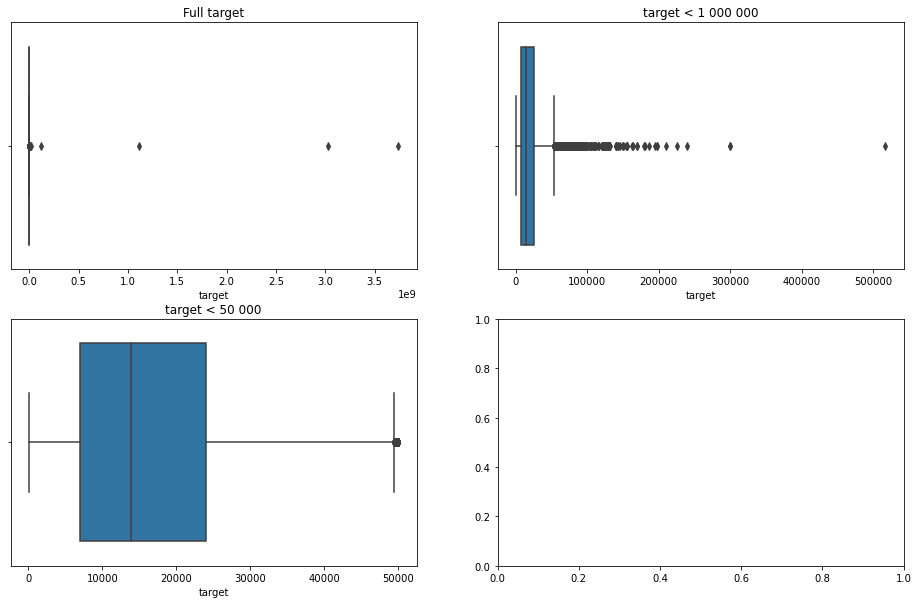

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))
ax1 = sns.boxplot(train.target, ax = axes[0,0])
ax2 = sns.boxplot(train[train.target < 1e6].target, ax = axes[0,1])
ax3 = sns.boxplot(train[train.target < 5e4].target, ax = axes[1,0])

ax1.title.set_text('Full target')
ax2.title.set_text('target < 1 000 000')
ax3.title.set_text('target < 50 000')

In [14]:
train[train.target > 1e6].target

3050      123456789
5676        1111111
6944       17000000
16424    1111111111
17087       6995495
42844    3736928711
49622    3024942282
49956       1111111
Name: target, dtype: int64

In [15]:
len((train[train.target > 50000].target))

1890

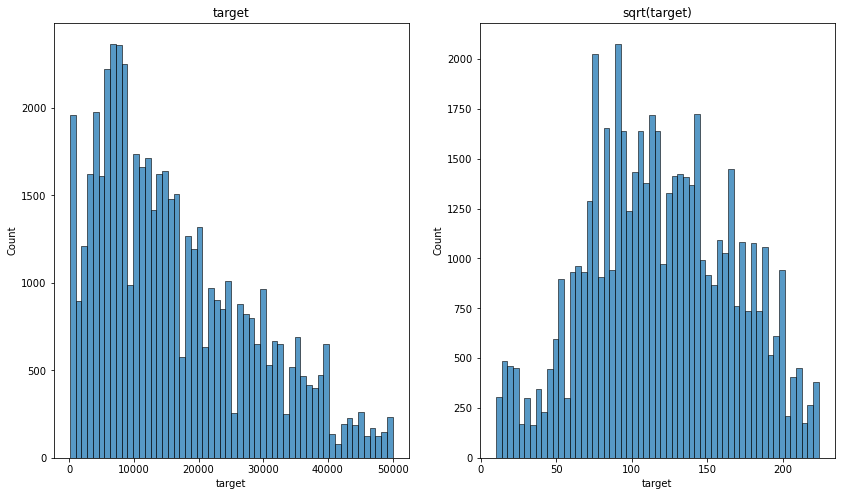

In [119]:
fig, axes = plt.subplots(ncols=2, figsize = (14,8))

ax1 = sns.histplot(train[train.target < 50000].target, ax = axes[0])
ax2 = sns.histplot(np.sqrt(train[train.target < 50000].target), ax = axes[1])
ax1.title.set_text('target')
ax2.title.set_text('sqrt(target)')

In [17]:
normaltest(np.sqrt(train[train.target < 50000].target))

NormaltestResult(statistic=1981.1172439505829, pvalue=0.0)

In [18]:
shapiro(np.sqrt(train[train.target < 50000].target))

ShapiroResult(statistic=0.989332377910614, pvalue=0.0)

**Not normal distribution**

# 2.2 Odometer

In [19]:
train['odometer'].quantile(0.95)

203043.5

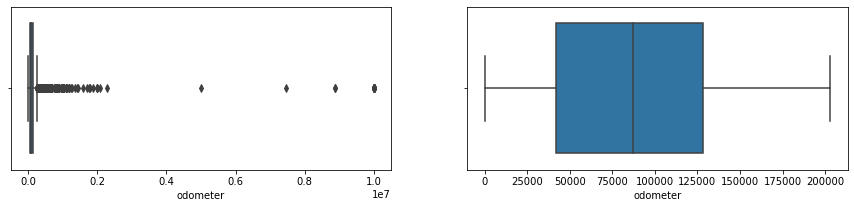

In [20]:
fig, axes = plt.subplots(ncols=2, figsize = (15, 3))

sns.boxplot(train.odometer, ax = axes[0])
sns.boxplot(train[train['odometer'] < 203043].odometer, ax = axes[1])

# 2.3 Year

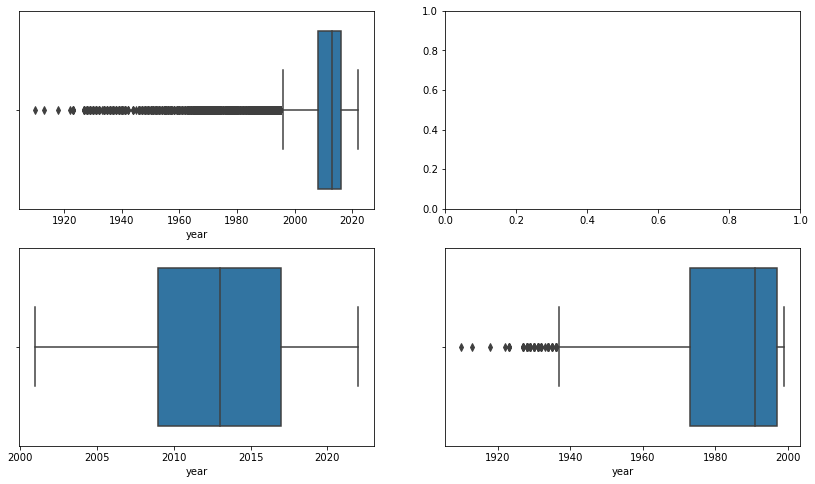

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 8))

sns.boxplot(train.year, ax = axes[0,0])
sns.boxplot(train[train['year'] > 2000].year , ax = axes[1,0])
sns.boxplot(train[train['year'] < 2000].year, ax = axes[1,1])

In [22]:
less_than_2000 = len(train[train.year < 2000].year)
more_than_2000 = len(train[train.year > 2000].year)

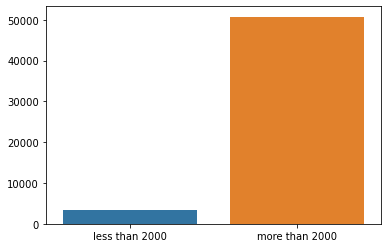

In [23]:
sns.barplot(x = ['less than 2000','more than 2000'], y = [less_than_2000, more_than_2000])

In [24]:
print(f'Number of years less than 2000: {less_than_2000}') 
print(f'Number of years is more than 2000: {more_than_2000}') 


Number of years less than 2000: 3348
Number of years is more than 2000: 50751


# 3.3 Mode in Columns 

In [25]:
MOST_POPULAR = {}

In [26]:
for column in train.columns.drop('target', 1):
    MOST_POPULAR[column] = train[column].value_counts().index[0]

In [27]:
MOST_POPULAR

{'region': 'columbus',
 'year': 2017.0,
 'manufacturer': 'ford',
 'model': 'f-150',
 'condition': 'excellent',
 'cylinders': '6 cylinders',
 'fuel': 'gas',
 'odometer': 1.0,
 'title_status': 'clean',
 'transmission': 'automatic',
 'drive': '4wd',
 'size': 'full-size',
 'type': 'sedan',
 'paint_color': 'white',
 'state': 'ca'}

# 3.4 State

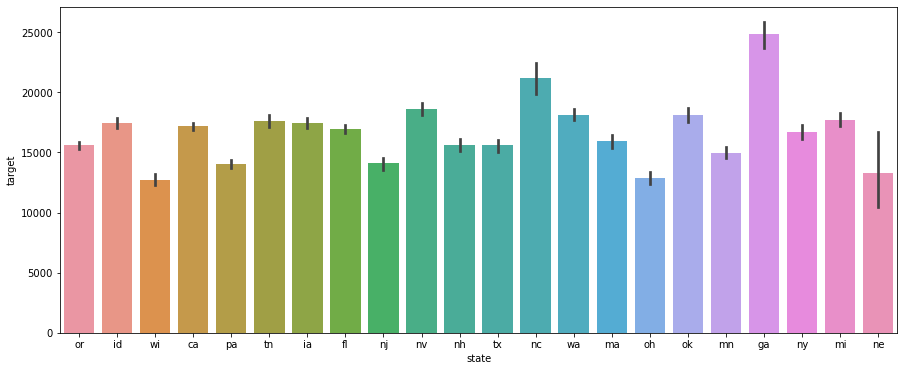

In [28]:
plt.figure(figsize = (15,6))
sns.barplot(x = train.state.dropna(), y = train[train.target < 50000].target)

In [29]:
number_of_sales = {}

for state in train.state.dropna().unique():
    number_of_sales[state] = len(train[train['state'] == state])

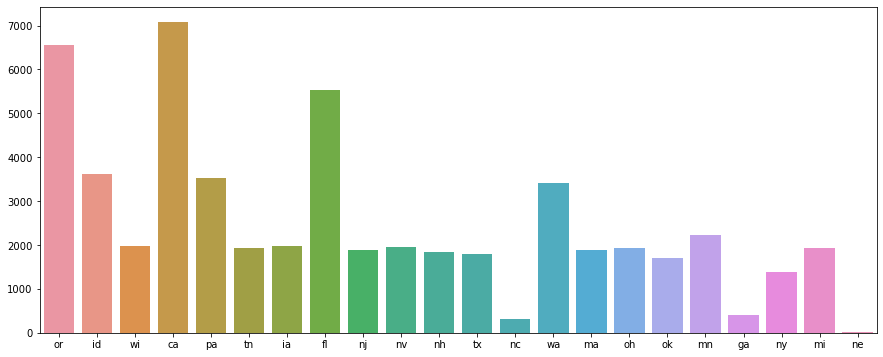

In [30]:
plt.figure(figsize = (15,6))

sns.barplot(x = list(number_of_sales.keys()), y = list(number_of_sales.values()))

In [31]:
train.state.value_counts()

ca    7076
or    6560
fl    5524
id    3624
pa    3530
wa    3414
mn    2220
wi    1988
ia    1985
nv    1947
mi    1939
tn    1937
oh    1924
nj    1893
ma    1892
nh    1830
tx    1793
ok    1698
ny    1385
ga     411
nc     308
ne      10
Name: state, dtype: int64

**Georgia spent the most money**
 and **the largest number of sales in California**

# 3. Corr

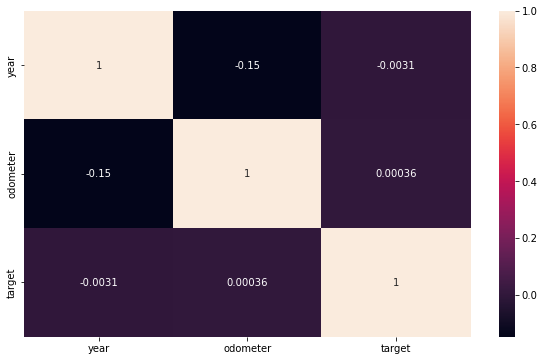

In [32]:
plt.figure(figsize = (10, 6))
sns.heatmap(train[['year','odometer','target']].corr(), annot=True)

# 3 Feature engineering and data processing

**I chose the values that I think are correct for filling in the NUL elements**

In [33]:
characteristics = {
 'region': 'columbus',
 'year': 2013,
 'manufacturer': "n",
 'model': "n",
 'condition': "n",
 'cylinders': '6 cylinders',
 'fuel': 'gas',
 'odometer': 100000,
 'title_status': 'clean',
 'transmission': 'automatic',
 'drive': 'fwd',
 'size': "n",
 'type': 'sedan',
 'paint_color': 'n',
 'state': 'ca'
}

In [34]:
def data_processing(data, characteristics_for_nun_elems, train = True):
    """
    
    """
    for column in characteristics_for_nun_elems:
        data[column] = data[column].fillna(characteristics_for_nun_elems[column])
    
    
    if train is True:
        data = data[data.year > 2000]
        data = data[data.target < 49000]
        data = data[data.odometer < 203043]
    
        return data.drop('target', 1), data.target
    else:
        return data
    
    

In [35]:
def data_processing_XGBOOST(data):
    """
    
    """
    object_columns = []
    numeric_columns = []

    for column in data.columns:
        if train[column].dtype == "object":
            object_columns.append(column)
        else:
            numeric_columns.append(column)
    
    dummies_data = pd.get_dummies(data[object_columns])
    dummies_data[numeric_columns] = data[numeric_columns]

    print(f"Shape data is {dummies_data.shape}")
    return dummies_data
    

# 4 Modeling

In [36]:
x,y = data_processing(train, characteristics)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.25)

# 4.1 Baseline Catboost

In [38]:
cat_features = [0,2,3,4,5,6,8,9,10,11,12,13,14]

In [39]:
CBR = CatBoostRegressor(cat_features=cat_features,  task_type='GPU')

In [40]:
CBR.fit(X_train, y_train)

Learning rate set to 0.078705
0:	learn: 11242.0648482	total: 63.9ms	remaining: 1m 3s
1:	learn: 11009.3923120	total: 114ms	remaining: 56.9s
2:	learn: 10811.6011650	total: 162ms	remaining: 53.8s
3:	learn: 10632.4808247	total: 214ms	remaining: 53.2s
4:	learn: 10480.0181041	total: 258ms	remaining: 51.4s
5:	learn: 10345.5756982	total: 306ms	remaining: 50.7s
6:	learn: 10071.4775322	total: 356ms	remaining: 50.5s
7:	learn: 9828.4720588	total: 404ms	remaining: 50.1s
8:	learn: 9620.4956619	total: 451ms	remaining: 49.6s
9:	learn: 9432.0634100	total: 502ms	remaining: 49.7s
10:	learn: 9268.7970214	total: 550ms	remaining: 49.4s
11:	learn: 9122.6354296	total: 595ms	remaining: 49s
12:	learn: 8991.1339211	total: 647ms	remaining: 49.1s
13:	learn: 8874.1881030	total: 694ms	remaining: 48.9s
14:	learn: 8762.7203972	total: 740ms	remaining: 48.6s
15:	learn: 8666.6658191	total: 784ms	remaining: 48.2s
16:	learn: 8567.7874268	total: 826ms	remaining: 47.7s
17:	learn: 8500.5824417	total: 868ms	remaining: 47.4s
18

156:	learn: 6408.7517192	total: 7.24s	remaining: 38.9s
157:	learn: 6405.2693532	total: 7.29s	remaining: 38.8s
158:	learn: 6401.1797262	total: 7.32s	remaining: 38.7s
159:	learn: 6398.8413316	total: 7.36s	remaining: 38.6s
160:	learn: 6397.6302755	total: 7.4s	remaining: 38.6s
161:	learn: 6395.7600479	total: 7.45s	remaining: 38.5s
162:	learn: 6393.3254547	total: 7.49s	remaining: 38.5s
163:	learn: 6390.2998780	total: 7.54s	remaining: 38.4s
164:	learn: 6386.9008877	total: 7.58s	remaining: 38.3s
165:	learn: 6385.2337172	total: 7.62s	remaining: 38.3s
166:	learn: 6375.6152610	total: 7.66s	remaining: 38.2s
167:	learn: 6374.3965741	total: 7.71s	remaining: 38.2s
168:	learn: 6371.4132307	total: 7.75s	remaining: 38.1s
169:	learn: 6368.7359578	total: 7.8s	remaining: 38.1s
170:	learn: 6359.2136647	total: 7.85s	remaining: 38.1s
171:	learn: 6353.2818055	total: 7.9s	remaining: 38s
172:	learn: 6350.4902907	total: 7.95s	remaining: 38s
173:	learn: 6348.3253468	total: 7.99s	remaining: 37.9s
174:	learn: 6340.

311:	learn: 5999.6293184	total: 14.2s	remaining: 31.4s
312:	learn: 5999.6290076	total: 14.3s	remaining: 31.3s
313:	learn: 5999.3881061	total: 14.3s	remaining: 31.2s
314:	learn: 5999.3871735	total: 14.3s	remaining: 31.2s
315:	learn: 5998.0342152	total: 14.4s	remaining: 31.1s
316:	learn: 5996.5932526	total: 14.4s	remaining: 31.1s
317:	learn: 5995.7382753	total: 14.5s	remaining: 31s
318:	learn: 5995.6505625	total: 14.5s	remaining: 31s
319:	learn: 5993.7547811	total: 14.6s	remaining: 30.9s
320:	learn: 5992.4341616	total: 14.6s	remaining: 30.9s
321:	learn: 5991.1129397	total: 14.6s	remaining: 30.8s
322:	learn: 5988.8769366	total: 14.7s	remaining: 30.8s
323:	learn: 5988.7567379	total: 14.7s	remaining: 30.8s
324:	learn: 5988.6735939	total: 14.8s	remaining: 30.7s
325:	learn: 5988.1666083	total: 14.8s	remaining: 30.7s
326:	learn: 5986.9699771	total: 14.9s	remaining: 30.6s
327:	learn: 5985.8812148	total: 14.9s	remaining: 30.6s
328:	learn: 5983.4942791	total: 15s	remaining: 30.6s
329:	learn: 5983

462:	learn: 5841.0978018	total: 20.7s	remaining: 24s
463:	learn: 5839.4242646	total: 20.7s	remaining: 24s
464:	learn: 5837.8368190	total: 20.8s	remaining: 23.9s
465:	learn: 5837.6052139	total: 20.8s	remaining: 23.9s
466:	learn: 5837.2713669	total: 20.9s	remaining: 23.8s
467:	learn: 5836.3147657	total: 20.9s	remaining: 23.8s
468:	learn: 5835.2419972	total: 21s	remaining: 23.7s
469:	learn: 5832.7921372	total: 21s	remaining: 23.7s
470:	learn: 5832.5312356	total: 21s	remaining: 23.6s
471:	learn: 5832.5296369	total: 21.1s	remaining: 23.6s
472:	learn: 5832.0666355	total: 21.1s	remaining: 23.5s
473:	learn: 5831.7209592	total: 21.2s	remaining: 23.5s
474:	learn: 5831.7033711	total: 21.2s	remaining: 23.5s
475:	learn: 5831.6893005	total: 21.3s	remaining: 23.4s
476:	learn: 5829.5380249	total: 21.3s	remaining: 23.4s
477:	learn: 5828.8469919	total: 21.3s	remaining: 23.3s
478:	learn: 5828.8466719	total: 21.4s	remaining: 23.3s
479:	learn: 5828.3315431	total: 21.4s	remaining: 23.2s
480:	learn: 5827.570

615:	learn: 5747.5796606	total: 27.2s	remaining: 17s
616:	learn: 5747.5786872	total: 27.3s	remaining: 16.9s
617:	learn: 5747.5731713	total: 27.3s	remaining: 16.9s
618:	learn: 5747.5725224	total: 27.4s	remaining: 16.8s
619:	learn: 5747.4531177	total: 27.4s	remaining: 16.8s
620:	learn: 5747.1247421	total: 27.4s	remaining: 16.8s
621:	learn: 5747.1240931	total: 27.5s	remaining: 16.7s
622:	learn: 5747.1240931	total: 27.5s	remaining: 16.7s
623:	learn: 5747.1237686	total: 27.6s	remaining: 16.6s
624:	learn: 5747.0316124	total: 27.6s	remaining: 16.6s
625:	learn: 5746.4156852	total: 27.7s	remaining: 16.5s
626:	learn: 5745.8558417	total: 27.7s	remaining: 16.5s
627:	learn: 5745.8561662	total: 27.8s	remaining: 16.4s
628:	learn: 5745.3108749	total: 27.8s	remaining: 16.4s
629:	learn: 5744.5087482	total: 27.9s	remaining: 16.4s
630:	learn: 5740.0831891	total: 27.9s	remaining: 16.3s
631:	learn: 5739.8294451	total: 28s	remaining: 16.3s
632:	learn: 5739.8287953	total: 28s	remaining: 16.2s
633:	learn: 5739

769:	learn: 5691.9786575	total: 33.7s	remaining: 10.1s
770:	learn: 5691.9783298	total: 33.8s	remaining: 10s
771:	learn: 5691.8354792	total: 33.8s	remaining: 9.99s
772:	learn: 5691.4957031	total: 33.9s	remaining: 9.94s
773:	learn: 5691.4288595	total: 33.9s	remaining: 9.9s
774:	learn: 5690.8196947	total: 34s	remaining: 9.86s
775:	learn: 5690.6030798	total: 34s	remaining: 9.81s
776:	learn: 5690.3917003	total: 34s	remaining: 9.77s
777:	learn: 5689.4399035	total: 34.1s	remaining: 9.72s
778:	learn: 5689.3307513	total: 34.1s	remaining: 9.68s
779:	learn: 5689.3297680	total: 34.2s	remaining: 9.63s
780:	learn: 5689.3294402	total: 34.2s	remaining: 9.59s
781:	learn: 5689.3291124	total: 34.2s	remaining: 9.54s
782:	learn: 5689.3281290	total: 34.3s	remaining: 9.49s
783:	learn: 5686.7478558	total: 34.3s	remaining: 9.45s
784:	learn: 5686.7334266	total: 34.3s	remaining: 9.41s
785:	learn: 5686.7209650	total: 34.4s	remaining: 9.36s
786:	learn: 5685.9145086	total: 34.4s	remaining: 9.32s
787:	learn: 5685.90

919:	learn: 5624.2015949	total: 40.1s	remaining: 3.49s
920:	learn: 5624.1840210	total: 40.2s	remaining: 3.44s
921:	learn: 5624.1836894	total: 40.2s	remaining: 3.4s
922:	learn: 5624.1836894	total: 40.2s	remaining: 3.36s
923:	learn: 5623.4584677	total: 40.3s	remaining: 3.31s
924:	learn: 5623.4581361	total: 40.3s	remaining: 3.27s
925:	learn: 5623.2319619	total: 40.4s	remaining: 3.22s
926:	learn: 5623.2233392	total: 40.4s	remaining: 3.18s
927:	learn: 5618.3158969	total: 40.4s	remaining: 3.14s
928:	learn: 5618.2946533	total: 40.5s	remaining: 3.09s
929:	learn: 5617.7243654	total: 40.5s	remaining: 3.05s
930:	learn: 5616.6553346	total: 40.6s	remaining: 3.01s
931:	learn: 5616.6423854	total: 40.6s	remaining: 2.96s
932:	learn: 5616.4886537	total: 40.6s	remaining: 2.92s
933:	learn: 5615.5432602	total: 40.7s	remaining: 2.88s
934:	learn: 5614.7275769	total: 40.7s	remaining: 2.83s
935:	learn: 5613.7357111	total: 40.8s	remaining: 2.79s
936:	learn: 5613.7303958	total: 40.8s	remaining: 2.74s
937:	learn:

In [41]:
pred_baseline = CBR.predict(X_test)

In [42]:
MAE_baseline = MAE(y_test, pred_baseline).round(2)
RMSE_baseline = np.sqrt(MSE(y_test, pred_baseline)).round(2)
MAPE_baseline = MAPE(y_test, pred_baseline).round(2)

In [43]:
score_df = pd.DataFrame(columns = ['Model_name', 'MAE', 'RMSE', 'MAPE'])

In [44]:
score_df = score_df.append({'Model_name' : 'baseline_catboost' , 
                            'MAE' : MAE_baseline, 
                            'RMSE' : RMSE_baseline, 
                            'MAPE' : MAPE_baseline}, ignore_index=True)

# 4.2 Best parameters Catboost

In [46]:
parameters_grid_catboost = {
    'iterations' : [500, 1000, 1500, 2000],
    'learning_rate' : [0.01, 0.05, 0.1],
    'depth' : [4,5,6]
}

In [47]:
CBR = CatBoostRegressor(cat_features=cat_features,  task_type='GPU')

In [48]:
GS_CBR = GridSearchCV(CBR, parameters_grid_catboost)

In [49]:
#GS_CBR.fit(X_train,y_train)

In [74]:
best_params_catboost = {'depth': 6, 'iterations': 2000, 'learning_rate': 0.1}

In [68]:
CBR = CatBoostRegressor(**best_params_catboost, cat_features=cat_features,  task_type='GPU')

In [69]:
CBR.fit(X_train,y_train)

0:	learn: 11175.5425265	total: 43.3ms	remaining: 1m 4s
1:	learn: 10895.9963503	total: 88.4ms	remaining: 1m 6s
2:	learn: 10662.3938701	total: 128ms	remaining: 1m 4s
3:	learn: 10468.7351535	total: 173ms	remaining: 1m 4s
4:	learn: 10304.0361634	total: 212ms	remaining: 1m 3s
5:	learn: 9965.5213378	total: 256ms	remaining: 1m 3s
6:	learn: 9675.6691356	total: 299ms	remaining: 1m 3s
7:	learn: 9433.6667687	total: 340ms	remaining: 1m 3s
8:	learn: 9233.2587688	total: 381ms	remaining: 1m 3s
9:	learn: 9042.4074223	total: 424ms	remaining: 1m 3s
10:	learn: 8875.0303354	total: 464ms	remaining: 1m 2s
11:	learn: 8744.2165042	total: 505ms	remaining: 1m 2s
12:	learn: 8624.9258722	total: 545ms	remaining: 1m 2s
13:	learn: 8506.2831955	total: 584ms	remaining: 1m 2s
14:	learn: 8422.4110467	total: 624ms	remaining: 1m 1s
15:	learn: 8335.6488548	total: 666ms	remaining: 1m 1s
16:	learn: 8257.1437505	total: 706ms	remaining: 1m 1s
17:	learn: 8195.9569295	total: 745ms	remaining: 1m 1s
18:	learn: 8124.5369646	total: 

155:	learn: 6271.6390981	total: 6.21s	remaining: 53.6s
156:	learn: 6269.1402400	total: 6.26s	remaining: 53.5s
157:	learn: 6259.2200434	total: 6.3s	remaining: 53.5s
158:	learn: 6257.8356470	total: 6.34s	remaining: 53.4s
159:	learn: 6257.0908783	total: 6.37s	remaining: 53.4s
160:	learn: 6255.3834469	total: 6.41s	remaining: 53.3s
161:	learn: 6253.6147148	total: 6.45s	remaining: 53.3s
162:	learn: 6250.1458675	total: 6.49s	remaining: 53.2s
163:	learn: 6245.6949058	total: 6.53s	remaining: 53.2s
164:	learn: 6244.7993755	total: 6.56s	remaining: 53.1s
165:	learn: 6244.2394171	total: 6.6s	remaining: 53s
166:	learn: 6239.9925518	total: 6.64s	remaining: 53s
167:	learn: 6236.9126259	total: 6.68s	remaining: 52.9s
168:	learn: 6235.8591293	total: 6.72s	remaining: 52.9s
169:	learn: 6233.6163802	total: 6.76s	remaining: 52.9s
170:	learn: 6232.7137286	total: 6.79s	remaining: 52.8s
171:	learn: 6229.0488232	total: 6.84s	remaining: 52.8s
172:	learn: 6224.6888336	total: 6.88s	remaining: 52.8s
173:	learn: 6223

308:	learn: 5947.7326927	total: 12.2s	remaining: 47s
309:	learn: 5947.6608901	total: 12.2s	remaining: 46.9s
310:	learn: 5943.4007238	total: 12.3s	remaining: 46.9s
311:	learn: 5943.3972723	total: 12.3s	remaining: 46.9s
312:	learn: 5943.3944483	total: 12.3s	remaining: 46.8s
313:	learn: 5943.2971771	total: 12.4s	remaining: 46.7s
314:	learn: 5942.5004349	total: 12.4s	remaining: 46.7s
315:	learn: 5942.0896269	total: 12.5s	remaining: 46.7s
316:	learn: 5942.0594978	total: 12.5s	remaining: 46.6s
317:	learn: 5940.5126639	total: 12.5s	remaining: 46.6s
318:	learn: 5940.3450241	total: 12.6s	remaining: 46.5s
319:	learn: 5938.0798545	total: 12.6s	remaining: 46.5s
320:	learn: 5937.1803293	total: 12.6s	remaining: 46.4s
321:	learn: 5933.5689217	total: 12.7s	remaining: 46.4s
322:	learn: 5931.7947755	total: 12.7s	remaining: 46.3s
323:	learn: 5931.0593740	total: 12.8s	remaining: 46.3s
324:	learn: 5925.8680972	total: 12.8s	remaining: 46.2s
325:	learn: 5925.8655796	total: 12.8s	remaining: 46.2s
326:	learn: 

460:	learn: 5796.8607243	total: 18s	remaining: 40.6s
461:	learn: 5796.8401350	total: 18.1s	remaining: 40.6s
462:	learn: 5794.7718257	total: 18.1s	remaining: 40.5s
463:	learn: 5793.9871680	total: 18.1s	remaining: 40.5s
464:	learn: 5792.8727587	total: 18.2s	remaining: 40.5s
465:	learn: 5790.3685792	total: 18.2s	remaining: 40.4s
466:	learn: 5790.3647144	total: 18.3s	remaining: 40.4s
467:	learn: 5789.1329955	total: 18.3s	remaining: 40.3s
468:	learn: 5788.2589732	total: 18.3s	remaining: 40.3s
469:	learn: 5787.3384170	total: 18.4s	remaining: 40.2s
470:	learn: 5787.2288556	total: 18.4s	remaining: 40.2s
471:	learn: 5787.1399160	total: 18.4s	remaining: 40.1s
472:	learn: 5785.6525530	total: 18.5s	remaining: 40.1s
473:	learn: 5781.7910369	total: 18.5s	remaining: 40.1s
474:	learn: 5780.8836450	total: 18.5s	remaining: 40s
475:	learn: 5777.1997132	total: 18.6s	remaining: 40s
476:	learn: 5777.1064227	total: 18.6s	remaining: 39.9s
477:	learn: 5776.2535033	total: 18.6s	remaining: 39.9s
478:	learn: 5775

612:	learn: 5711.4670943	total: 23.7s	remaining: 34.3s
613:	learn: 5711.4667678	total: 23.7s	remaining: 34.2s
614:	learn: 5711.4661147	total: 23.7s	remaining: 34.2s
615:	learn: 5711.4625231	total: 23.8s	remaining: 34.1s
616:	learn: 5711.4612170	total: 23.8s	remaining: 34.1s
617:	learn: 5711.4608905	total: 23.9s	remaining: 34s
618:	learn: 5711.4602374	total: 23.9s	remaining: 34s
619:	learn: 5711.3123231	total: 23.9s	remaining: 34s
620:	learn: 5711.3123231	total: 24s	remaining: 33.9s
621:	learn: 5710.7219339	total: 24s	remaining: 33.9s
622:	learn: 5710.7216074	total: 24.1s	remaining: 33.9s
623:	learn: 5710.7212808	total: 24.1s	remaining: 33.8s
624:	learn: 5710.7167090	total: 24.1s	remaining: 33.8s
625:	learn: 5709.6484317	total: 24.2s	remaining: 33.8s
626:	learn: 5708.9912324	total: 24.2s	remaining: 33.7s
627:	learn: 5708.9869858	total: 24.3s	remaining: 33.7s
628:	learn: 5708.5534931	total: 24.3s	remaining: 33.7s
629:	learn: 5708.5505530	total: 24.3s	remaining: 33.6s
630:	learn: 5708.549

763:	learn: 5697.4030177	total: 29.3s	remaining: 28.3s
764:	learn: 5697.4023631	total: 29.4s	remaining: 28.2s
765:	learn: 5697.4017084	total: 29.4s	remaining: 28.2s
766:	learn: 5697.4007265	total: 29.4s	remaining: 28.1s
767:	learn: 5696.7712493	total: 29.5s	remaining: 28.1s
768:	learn: 5696.7712493	total: 29.5s	remaining: 28.1s
769:	learn: 5696.7702672	total: 29.6s	remaining: 28s
770:	learn: 5696.7696125	total: 29.6s	remaining: 28s
771:	learn: 5696.7647021	total: 29.6s	remaining: 27.9s
772:	learn: 5696.0847355	total: 29.7s	remaining: 27.9s
773:	learn: 5696.0844081	total: 29.7s	remaining: 27.8s
774:	learn: 5696.0382447	total: 29.7s	remaining: 27.8s
775:	learn: 5696.0143444	total: 29.8s	remaining: 27.8s
776:	learn: 5695.1928315	total: 29.8s	remaining: 27.7s
777:	learn: 5695.1928315	total: 29.8s	remaining: 27.7s
778:	learn: 5695.1921766	total: 29.9s	remaining: 27.6s
779:	learn: 5695.1636884	total: 29.9s	remaining: 27.6s
780:	learn: 5695.1633609	total: 29.9s	remaining: 27.6s
781:	learn: 56

918:	learn: 5677.0648355	total: 34.9s	remaining: 22.1s
919:	learn: 5677.0645070	total: 35s	remaining: 22s
920:	learn: 5677.0635215	total: 35s	remaining: 22s
921:	learn: 5676.7120202	total: 35s	remaining: 22s
922:	learn: 5676.7120202	total: 35.1s	remaining: 21.9s
923:	learn: 5676.2165964	total: 35.1s	remaining: 21.9s
924:	learn: 5676.2100255	total: 35.2s	remaining: 21.9s
925:	learn: 5674.5434000	total: 35.2s	remaining: 21.8s
926:	learn: 5674.5328835	total: 35.2s	remaining: 21.8s
927:	learn: 5674.5322262	total: 35.3s	remaining: 21.7s
928:	learn: 5674.5305830	total: 35.3s	remaining: 21.7s
929:	learn: 5674.5299257	total: 35.3s	remaining: 21.7s
930:	learn: 5674.5295971	total: 35.4s	remaining: 21.6s
931:	learn: 5674.5286111	total: 35.4s	remaining: 21.6s
932:	learn: 5674.5279538	total: 35.5s	remaining: 21.5s
933:	learn: 5674.5276252	total: 35.5s	remaining: 21.5s
934:	learn: 5674.5272966	total: 35.5s	remaining: 21.5s
935:	learn: 5674.5263106	total: 35.6s	remaining: 21.4s
936:	learn: 5674.50757

1073:	learn: 5632.7787501	total: 40.7s	remaining: 16.2s
1074:	learn: 5631.5857485	total: 40.8s	remaining: 16.1s
1075:	learn: 5631.5860796	total: 40.8s	remaining: 16.1s
1076:	learn: 5631.5860796	total: 40.8s	remaining: 16s
1077:	learn: 5631.5476663	total: 40.9s	remaining: 16s
1078:	learn: 5631.5426990	total: 40.9s	remaining: 16s
1079:	learn: 5631.1721289	total: 40.9s	remaining: 15.9s
1080:	learn: 5629.5673680	total: 41s	remaining: 15.9s
1081:	learn: 5629.5461669	total: 41s	remaining: 15.8s
1082:	learn: 5629.5398728	total: 41.1s	remaining: 15.8s
1083:	learn: 5629.5398728	total: 41.1s	remaining: 15.8s
1084:	learn: 5628.4909780	total: 41.1s	remaining: 15.7s
1085:	learn: 5628.3849512	total: 41.2s	remaining: 15.7s
1086:	learn: 5628.3716977	total: 41.2s	remaining: 15.7s
1087:	learn: 5628.3617576	total: 41.2s	remaining: 15.6s
1088:	learn: 5628.3478414	total: 41.3s	remaining: 15.6s
1089:	learn: 5627.9979365	total: 41.3s	remaining: 15.5s
1090:	learn: 5627.7285347	total: 41.4s	remaining: 15.5s
10

1225:	learn: 5599.3279173	total: 46.3s	remaining: 10.3s
1226:	learn: 5599.3279173	total: 46.3s	remaining: 10.3s
1227:	learn: 5599.0038442	total: 46.4s	remaining: 10.3s
1228:	learn: 5598.9885227	total: 46.4s	remaining: 10.2s
1229:	learn: 5598.5431818	total: 46.5s	remaining: 10.2s
1230:	learn: 5598.1944122	total: 46.5s	remaining: 10.2s
1231:	learn: 5598.0578298	total: 46.5s	remaining: 10.1s
1232:	learn: 5598.0348437	total: 46.6s	remaining: 10.1s
1233:	learn: 5598.0288473	total: 46.6s	remaining: 10s
1234:	learn: 5598.0261822	total: 46.7s	remaining: 10s
1235:	learn: 5597.8079754	total: 46.7s	remaining: 9.97s
1236:	learn: 5597.8053102	total: 46.7s	remaining: 9.93s
1237:	learn: 5597.7406794	total: 46.8s	remaining: 9.9s
1238:	learn: 5597.7390136	total: 46.8s	remaining: 9.86s
1239:	learn: 5597.7366816	total: 46.8s	remaining: 9.82s
1240:	learn: 5597.3108985	total: 46.9s	remaining: 9.78s
1241:	learn: 5597.3088995	total: 46.9s	remaining: 9.74s
1242:	learn: 5596.9094068	total: 46.9s	remaining: 9.7

1375:	learn: 5585.8714303	total: 51.8s	remaining: 4.66s
1376:	learn: 5585.8709295	total: 51.8s	remaining: 4.63s
1377:	learn: 5585.4470800	total: 51.8s	remaining: 4.59s
1378:	learn: 5585.4470800	total: 51.9s	remaining: 4.55s
1379:	learn: 5585.4470800	total: 51.9s	remaining: 4.51s
1380:	learn: 5585.4470800	total: 51.9s	remaining: 4.47s
1381:	learn: 5585.4470800	total: 52s	remaining: 4.44s
1382:	learn: 5585.3636084	total: 52s	remaining: 4.4s
1383:	learn: 5585.3637753	total: 52.1s	remaining: 4.36s
1384:	learn: 5585.3644431	total: 52.1s	remaining: 4.32s
1385:	learn: 5585.3641092	total: 52.1s	remaining: 4.29s
1386:	learn: 5585.3637753	total: 52.2s	remaining: 4.25s
1387:	learn: 5584.8836224	total: 52.2s	remaining: 4.21s
1388:	learn: 5584.8822868	total: 52.2s	remaining: 4.17s
1389:	learn: 5584.2952286	total: 52.3s	remaining: 4.14s
1390:	learn: 5584.2948946	total: 52.3s	remaining: 4.1s
1391:	learn: 5583.9048241	total: 52.3s	remaining: 4.06s
1392:	learn: 5583.9051581	total: 52.4s	remaining: 4.02

In [70]:
pred_bestparams = CBR.predict(X_test)

In [71]:
MAE_bestparams = MAE(y_test, pred_bestparams).round(2)
RMSE_bestparams = np.sqrt(MSE(y_test, pred_bestparams)).round(2)
MAPE_bestparams = MAPE(y_test, pred_bestparams).round(2)

In [72]:
score_df = score_df.append({'Model_name' : 'best_params_catboost' , 
                            'MAE' : MAE_bestparams, 
                            'RMSE' : RMSE_bestparams, 
                            'MAPE' : MAPE_bestparams}, ignore_index=True)

# 4.3 Baseline XGBoost 

In [79]:
Xb,yb = data_processing(train, characteristics)

In [80]:
Xb_trans = data_processing_XGBOOST(Xb)

Shape data is (46856, 8042)


In [81]:
Xb_trans_train = Xb_trans.iloc[: 35142]
yb_train = yb.iloc[: 35142]

Xb_trans_test = Xb_trans.iloc[35142 :]
yb_test = yb.iloc[35142 :]

In [82]:
test_XGB = XGBRegressor( n_jobs = -1)

In [83]:
test_XGB.fit(Xb_trans_train, yb_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
test_XGB_pred = test_XGB.predict(Xb_trans_test)

In [85]:
MAE_bestparams = MAE(yb_test, test_XGB_pred).round(2)
RMSE_bestparams = np.sqrt(MSE(yb_test, test_XGB_pred)).round(2)
MAPE_bestparams = MAPE(yb_test, test_XGB_pred).round(2)

In [86]:
score_df = score_df.append({'Model_name' : 'baseline_XGB' , 
                            'MAE' : MAE_bestparams, 
                            'RMSE' : RMSE_bestparams, 
                            'MAPE' : MAPE_bestparams}, ignore_index=True)

# 4.4 Best parameters XGBoost

In [88]:
parameters_grid_XGB = {
    'n_estimators' : [100, 150],
    'learning_rate' : [0.3, 0.5],
    'max_depth' : [5,6]
}

In [89]:
XGB = XGBRegressor( n_jobs = -1)

In [90]:
PG_XGB = GridSearchCV(XGB, parameters_grid_XGB, cv = 3)

In [91]:
PG_XGB.fit(Xb_trans_train, yb_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [92]:
PG_XGB.best_params_

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 150}

In [94]:
XGB = XGBRegressor(**PG_XGB.best_params_, n_jobs = -1)

In [95]:
XGB.fit(Xb_trans_train,yb_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
XGB_pred = XGB.predict(Xb_trans_test)

In [102]:
MAE_bestparams = MAE(yb_test, XGB_pred).round(2)
RMSE_bestparams = np.sqrt(MSE(yb_test, XGB_pred)).round(2)
MAPE_bestparams = MAPE(yb_test, XGB_pred).round(2)

In [103]:
score_df = score_df.append({'Model_name' : 'bestparams_XGB' , 
                            'MAE' : MAE_bestparams, 
                            'RMSE' : RMSE_bestparams, 
                            'MAPE' : MAPE_bestparams}, ignore_index=True)

# 4.5 Final scores

In [104]:
score_df 

,Model_name,MAE,RMSE,MAPE
0,baseline_catboost,3677.79,5522.95,1.49
1,best_params_catboost,3657.40,5478.75,1.45
2,baseline_XGB,3812.97,5648.36,1.73
3,bestparams_XGB,3613.71,5406.81,1.57


# 5 Predict

In [106]:
cat_features = [0,2,3,4,5,6,8,9,10,11,12,13,14]

In [110]:
best_params_catboost = {'depth': 6, 'iterations': 2000, 'learning_rate': 0.1}

In [111]:
CBR = CatBoostRegressor(**best_params_catboost, cat_features=cat_features,  task_type='GPU')

In [112]:
x,y = data_processing(train, characteristics)

In [113]:
CBR.fit(x,y)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 11127.9546257	total: 48.9ms	remaining: 1m 37s
1:	learn: 10827.4222562	total: 96ms	remaining: 1m 35s
2:	learn: 10581.0720785	total: 146ms	remaining: 1m 37s
3:	learn: 10371.8875635	total: 195ms	remaining: 1m 37s
4:	learn: 10192.6065966	total: 246ms	remaining: 1m 38s
5:	learn: 9848.9631346	total: 299ms	remaining: 1m 39s
6:	learn: 9553.3206207	total: 347ms	remaining: 1m 38s
7:	learn: 9308.5846281	total: 398ms	remaining: 1m 38s
8:	learn: 9106.6948850	total: 449ms	remaining: 1m 39s
9:	learn: 8924.4705064	total: 499ms	remaining: 1m 39s
10:	learn: 8764.2530001	total: 549ms	remaining: 1m 39s
11:	learn: 8632.7115073	total: 598ms	remaining: 1m 38s
12:	learn: 8499.1853998	total: 643ms	remaining: 1m 38s
13:	learn: 8398.5252512	total: 691ms	remaining: 1m 38s
14:	learn: 8293.2257127	total: 740ms	remaining: 1m 37s
15:	learn: 8214.7585524	total: 786ms	remaining: 1m 37s
16:	learn: 8138.1810755	total: 834ms	remaining: 1m 37s
17:	learn: 8065.0213586	total: 881ms	remaining: 1m 36s
18:	learn: 8007

150:	learn: 6246.8827261	total: 7.21s	remaining: 1m 28s
151:	learn: 6240.2327568	total: 7.25s	remaining: 1m 28s
152:	learn: 6236.6067325	total: 7.3s	remaining: 1m 28s
153:	learn: 6235.9316507	total: 7.35s	remaining: 1m 28s
154:	learn: 6230.5903215	total: 7.39s	remaining: 1m 27s
155:	learn: 6228.8480815	total: 7.43s	remaining: 1m 27s
156:	learn: 6209.3666941	total: 7.48s	remaining: 1m 27s
157:	learn: 6208.1632847	total: 7.52s	remaining: 1m 27s
158:	learn: 6205.9701009	total: 7.56s	remaining: 1m 27s
159:	learn: 6197.9203580	total: 7.62s	remaining: 1m 27s
160:	learn: 6192.5647632	total: 7.67s	remaining: 1m 27s
161:	learn: 6191.2340642	total: 7.7s	remaining: 1m 27s
162:	learn: 6189.2791730	total: 7.75s	remaining: 1m 27s
163:	learn: 6188.0094736	total: 7.8s	remaining: 1m 27s
164:	learn: 6186.0354754	total: 7.85s	remaining: 1m 27s
165:	learn: 6184.4950842	total: 7.9s	remaining: 1m 27s
166:	learn: 6181.2065622	total: 7.96s	remaining: 1m 27s
167:	learn: 6177.7849776	total: 8.01s	remaining: 1m 

299:	learn: 5848.6224741	total: 14.4s	remaining: 1m 21s
300:	learn: 5848.5234672	total: 14.4s	remaining: 1m 21s
301:	learn: 5847.3680245	total: 14.5s	remaining: 1m 21s
302:	learn: 5847.3110955	total: 14.5s	remaining: 1m 21s
303:	learn: 5842.9213506	total: 14.5s	remaining: 1m 21s
304:	learn: 5842.3896673	total: 14.6s	remaining: 1m 21s
305:	learn: 5841.0491128	total: 14.6s	remaining: 1m 21s
306:	learn: 5838.4030149	total: 14.7s	remaining: 1m 21s
307:	learn: 5838.3469567	total: 14.7s	remaining: 1m 20s
308:	learn: 5836.2115558	total: 14.8s	remaining: 1m 20s
309:	learn: 5836.0083261	total: 14.8s	remaining: 1m 20s
310:	learn: 5834.0247877	total: 14.9s	remaining: 1m 20s
311:	learn: 5828.8478717	total: 14.9s	remaining: 1m 20s
312:	learn: 5827.8634882	total: 15s	remaining: 1m 20s
313:	learn: 5827.0469621	total: 15s	remaining: 1m 20s
314:	learn: 5826.9101432	total: 15.1s	remaining: 1m 20s
315:	learn: 5822.2703201	total: 15.1s	remaining: 1m 20s
316:	learn: 5820.3561146	total: 15.2s	remaining: 1m 

446:	learn: 5706.6609461	total: 21.9s	remaining: 1m 16s
447:	learn: 5706.6582501	total: 22s	remaining: 1m 16s
448:	learn: 5706.6251623	total: 22s	remaining: 1m 16s
449:	learn: 5706.6246721	total: 22.1s	remaining: 1m 16s
450:	learn: 5706.5984468	total: 22.1s	remaining: 1m 15s
451:	learn: 5705.8805135	total: 22.2s	remaining: 1m 15s
452:	learn: 5704.9558176	total: 22.2s	remaining: 1m 15s
453:	learn: 5704.9425786	total: 22.3s	remaining: 1m 15s
454:	learn: 5704.8405879	total: 22.3s	remaining: 1m 15s
455:	learn: 5703.7840431	total: 22.4s	remaining: 1m 15s
456:	learn: 5703.7725178	total: 22.4s	remaining: 1m 15s
457:	learn: 5703.7700656	total: 22.5s	remaining: 1m 15s
458:	learn: 5703.7676134	total: 22.6s	remaining: 1m 15s
459:	learn: 5700.2191816	total: 22.6s	remaining: 1m 15s
460:	learn: 5698.6282196	total: 22.7s	remaining: 1m 15s
461:	learn: 5695.9790666	total: 22.7s	remaining: 1m 15s
462:	learn: 5695.3651495	total: 22.8s	remaining: 1m 15s
463:	learn: 5695.3135774	total: 22.8s	remaining: 1m 

594:	learn: 5633.3731699	total: 30.4s	remaining: 1m 11s
595:	learn: 5632.2304577	total: 30.5s	remaining: 1m 11s
596:	learn: 5632.2294643	total: 30.6s	remaining: 1m 11s
597:	learn: 5632.2292160	total: 30.6s	remaining: 1m 11s
598:	learn: 5632.2292160	total: 30.7s	remaining: 1m 11s
599:	learn: 5632.1249152	total: 30.7s	remaining: 1m 11s
600:	learn: 5632.1249152	total: 30.8s	remaining: 1m 11s
601:	learn: 5632.1249152	total: 30.8s	remaining: 1m 11s
602:	learn: 5632.1239218	total: 30.9s	remaining: 1m 11s
603:	learn: 5632.1244185	total: 30.9s	remaining: 1m 11s
604:	learn: 5632.1244185	total: 31s	remaining: 1m 11s
605:	learn: 5632.1241702	total: 31s	remaining: 1m 11s
606:	learn: 5632.1239218	total: 31.1s	remaining: 1m 11s
607:	learn: 5632.1239218	total: 31.2s	remaining: 1m 11s
608:	learn: 5632.1236735	total: 31.2s	remaining: 1m 11s
609:	learn: 5631.8708601	total: 31.3s	remaining: 1m 11s
610:	learn: 5631.8708601	total: 31.3s	remaining: 1m 11s
611:	learn: 5631.8706118	total: 31.4s	remaining: 1m 

745:	learn: 5587.7494864	total: 40.3s	remaining: 1m 7s
746:	learn: 5587.7492361	total: 40.4s	remaining: 1m 7s
747:	learn: 5587.7344678	total: 40.5s	remaining: 1m 7s
748:	learn: 5587.6273339	total: 40.5s	remaining: 1m 7s
749:	learn: 5587.6280848	total: 40.6s	remaining: 1m 7s
750:	learn: 5587.2836405	total: 40.7s	remaining: 1m 7s
751:	learn: 5587.2838908	total: 40.7s	remaining: 1m 7s
752:	learn: 5586.7754462	total: 40.8s	remaining: 1m 7s
753:	learn: 5581.2779848	total: 40.9s	remaining: 1m 7s
754:	learn: 5580.4221202	total: 41s	remaining: 1m 7s
755:	learn: 5576.9903261	total: 41s	remaining: 1m 7s
756:	learn: 5576.8082477	total: 41.1s	remaining: 1m 7s
757:	learn: 5575.0235140	total: 41.2s	remaining: 1m 7s
758:	learn: 5574.3383155	total: 41.3s	remaining: 1m 7s
759:	learn: 5574.3365591	total: 41.3s	remaining: 1m 7s
760:	learn: 5574.3337991	total: 41.4s	remaining: 1m 7s
761:	learn: 5574.3325445	total: 41.4s	remaining: 1m 7s
762:	learn: 5574.3302863	total: 41.5s	remaining: 1m 7s
763:	learn: 55

895:	learn: 5522.1446475	total: 50.7s	remaining: 1m 2s
896:	learn: 5522.1423680	total: 50.8s	remaining: 1m 2s
897:	learn: 5522.1416081	total: 50.8s	remaining: 1m 2s
898:	learn: 5521.6942910	total: 50.9s	remaining: 1m 2s
899:	learn: 5521.4817647	total: 51s	remaining: 1m 2s
900:	learn: 5521.4820180	total: 51s	remaining: 1m 2s
901:	learn: 5521.4820180	total: 51.1s	remaining: 1m 2s
902:	learn: 5520.6455121	total: 51.2s	remaining: 1m 2s
903:	learn: 5520.6462722	total: 51.2s	remaining: 1m 2s
904:	learn: 5520.6465255	total: 51.3s	remaining: 1m 2s
905:	learn: 5520.6305643	total: 51.4s	remaining: 1m 2s
906:	learn: 5520.5907877	total: 51.4s	remaining: 1m 1s
907:	learn: 5520.5910411	total: 51.5s	remaining: 1m 1s
908:	learn: 5520.5907877	total: 51.5s	remaining: 1m 1s
909:	learn: 5520.5907877	total: 51.6s	remaining: 1m 1s
910:	learn: 5520.5900277	total: 51.7s	remaining: 1m 1s
911:	learn: 5520.5900277	total: 51.7s	remaining: 1m 1s
912:	learn: 5520.5900277	total: 51.8s	remaining: 1m 1s
913:	learn: 55

1046:	learn: 5496.9274037	total: 1m	remaining: 55.3s
1047:	learn: 5496.2660602	total: 1m	remaining: 55.3s
1048:	learn: 5496.2655512	total: 1m	remaining: 55.2s
1049:	learn: 5496.2655512	total: 1m	remaining: 55.2s
1050:	learn: 5496.2640244	total: 1m 1s	remaining: 55.1s
1051:	learn: 5496.2640244	total: 1m 1s	remaining: 55.1s
1052:	learn: 5496.2640244	total: 1m 1s	remaining: 55s
1053:	learn: 5495.9667882	total: 1m 1s	remaining: 55s
1054:	learn: 5495.1172351	total: 1m 1s	remaining: 54.9s
1055:	learn: 5495.1164715	total: 1m 1s	remaining: 54.9s
1056:	learn: 5495.1167260	total: 1m 1s	remaining: 54.8s
1057:	learn: 5494.8364821	total: 1m 1s	remaining: 54.7s
1058:	learn: 5493.1213630	total: 1m 1s	remaining: 54.7s
1059:	learn: 5493.0691653	total: 1m 1s	remaining: 54.6s
1060:	learn: 5493.0689107	total: 1m 1s	remaining: 54.6s
1061:	learn: 5493.0689107	total: 1m 1s	remaining: 54.5s
1062:	learn: 5492.2543075	total: 1m 1s	remaining: 54.5s
1063:	learn: 5492.2441210	total: 1m 1s	remaining: 54.4s
1064:	le

1193:	learn: 5455.6391976	total: 1m 10s	remaining: 47.7s
1194:	learn: 5455.6389413	total: 1m 10s	remaining: 47.6s
1195:	learn: 5455.6389413	total: 1m 10s	remaining: 47.6s
1196:	learn: 5455.6389413	total: 1m 10s	remaining: 47.5s
1197:	learn: 5455.6386849	total: 1m 10s	remaining: 47.5s
1198:	learn: 5455.6384285	total: 1m 10s	remaining: 47.4s
1199:	learn: 5455.6386849	total: 1m 11s	remaining: 47.4s
1200:	learn: 5455.6384285	total: 1m 11s	remaining: 47.3s
1201:	learn: 5455.6386849	total: 1m 11s	remaining: 47.3s
1202:	learn: 5455.6384285	total: 1m 11s	remaining: 47.2s
1203:	learn: 5455.6384285	total: 1m 11s	remaining: 47.1s
1204:	learn: 5455.6381722	total: 1m 11s	remaining: 47.1s
1205:	learn: 5455.6381722	total: 1m 11s	remaining: 47s
1206:	learn: 5455.6379158	total: 1m 11s	remaining: 47s
1207:	learn: 5455.6376594	total: 1m 11s	remaining: 46.9s
1208:	learn: 5455.6376594	total: 1m 11s	remaining: 46.8s
1209:	learn: 5455.6376594	total: 1m 11s	remaining: 46.8s
1210:	learn: 5455.6376594	total: 1m

1341:	learn: 5423.3078057	total: 1m 20s	remaining: 39.4s
1342:	learn: 5423.3078057	total: 1m 20s	remaining: 39.3s
1343:	learn: 5423.3075478	total: 1m 20s	remaining: 39.2s
1344:	learn: 5423.3075478	total: 1m 20s	remaining: 39.2s
1345:	learn: 5423.3070320	total: 1m 20s	remaining: 39.1s
1346:	learn: 5422.3086111	total: 1m 20s	remaining: 39.1s
1347:	learn: 5422.1133417	total: 1m 20s	remaining: 39s
1348:	learn: 5422.1123099	total: 1m 20s	remaining: 38.9s
1349:	learn: 5422.1084405	total: 1m 20s	remaining: 38.9s
1350:	learn: 5422.1079246	total: 1m 20s	remaining: 38.8s
1351:	learn: 5421.5723803	total: 1m 20s	remaining: 38.8s
1352:	learn: 5421.5721224	total: 1m 20s	remaining: 38.7s
1353:	learn: 5421.5708325	total: 1m 21s	remaining: 38.7s
1354:	learn: 5420.7106519	total: 1m 21s	remaining: 38.6s
1355:	learn: 5420.7106519	total: 1m 21s	remaining: 38.5s
1356:	learn: 5420.7106519	total: 1m 21s	remaining: 38.5s
1357:	learn: 5420.7103938	total: 1m 21s	remaining: 38.4s
1358:	learn: 5420.7103938	total: 

1488:	learn: 5406.7485896	total: 1m 30s	remaining: 31s
1489:	learn: 5406.7485896	total: 1m 30s	remaining: 31s
1490:	learn: 5406.7467788	total: 1m 30s	remaining: 30.9s
1491:	learn: 5406.7444506	total: 1m 30s	remaining: 30.9s
1492:	learn: 5406.7444506	total: 1m 30s	remaining: 30.8s
1493:	learn: 5406.7439332	total: 1m 30s	remaining: 30.8s
1494:	learn: 5406.7434158	total: 1m 30s	remaining: 30.7s
1495:	learn: 5406.7428984	total: 1m 31s	remaining: 30.7s
1496:	learn: 5406.7434158	total: 1m 31s	remaining: 30.6s
1497:	learn: 5406.7053883	total: 1m 31s	remaining: 30.6s
1498:	learn: 5406.7053883	total: 1m 31s	remaining: 30.5s
1499:	learn: 5406.6689127	total: 1m 31s	remaining: 30.5s
1500:	learn: 5406.4660934	total: 1m 31s	remaining: 30.4s
1501:	learn: 5405.3972863	total: 1m 31s	remaining: 30.4s
1502:	learn: 5405.3970275	total: 1m 31s	remaining: 30.4s
1503:	learn: 5405.3941812	total: 1m 31s	remaining: 30.3s
1504:	learn: 5404.3924510	total: 1m 32s	remaining: 30.3s
1505:	learn: 5404.3916746	total: 1m

1633:	learn: 5392.1745673	total: 1m 42s	remaining: 22.9s
1634:	learn: 5392.1748266	total: 1m 42s	remaining: 22.8s
1635:	learn: 5392.1745673	total: 1m 42s	remaining: 22.8s
1636:	learn: 5392.1745673	total: 1m 42s	remaining: 22.7s
1637:	learn: 5392.1745673	total: 1m 42s	remaining: 22.6s
1638:	learn: 5392.1745673	total: 1m 42s	remaining: 22.6s
1639:	learn: 5392.1709358	total: 1m 42s	remaining: 22.5s
1640:	learn: 5392.1688607	total: 1m 42s	remaining: 22.5s
1641:	learn: 5392.1683419	total: 1m 42s	remaining: 22.4s
1642:	learn: 5392.1680825	total: 1m 42s	remaining: 22.3s
1643:	learn: 5391.3862279	total: 1m 42s	remaining: 22.3s
1644:	learn: 5391.3862279	total: 1m 42s	remaining: 22.2s
1645:	learn: 5391.3862279	total: 1m 42s	remaining: 22.1s
1646:	learn: 5391.3862279	total: 1m 43s	remaining: 22.1s
1647:	learn: 5391.3862279	total: 1m 43s	remaining: 22s
1648:	learn: 5391.3519835	total: 1m 43s	remaining: 22s
1649:	learn: 5391.3493892	total: 1m 43s	remaining: 21.9s
1650:	learn: 5391.3493892	total: 1m

1778:	learn: 5364.9280361	total: 1m 51s	remaining: 13.9s
1779:	learn: 5364.9212577	total: 1m 51s	remaining: 13.8s
1780:	learn: 5364.4318899	total: 1m 51s	remaining: 13.8s
1781:	learn: 5363.5450739	total: 1m 51s	remaining: 13.7s
1782:	learn: 5363.5445523	total: 1m 52s	remaining: 13.6s
1783:	learn: 5363.5101302	total: 1m 52s	remaining: 13.6s
1784:	learn: 5363.4717961	total: 1m 52s	remaining: 13.5s
1785:	learn: 5363.4438930	total: 1m 52s	remaining: 13.4s
1786:	learn: 5363.4303325	total: 1m 52s	remaining: 13.4s
1787:	learn: 5363.4274639	total: 1m 52s	remaining: 13.3s
1788:	learn: 5363.3987782	total: 1m 52s	remaining: 13.3s
1789:	learn: 5363.3990390	total: 1m 52s	remaining: 13.2s
1790:	learn: 5363.0313263	total: 1m 52s	remaining: 13.1s
1791:	learn: 5363.0287183	total: 1m 52s	remaining: 13.1s
1792:	learn: 5363.0281967	total: 1m 52s	remaining: 13s
1793:	learn: 5363.0281967	total: 1m 52s	remaining: 12.9s
1794:	learn: 5363.0227199	total: 1m 52s	remaining: 12.9s
1795:	learn: 5363.0227199	total: 

1924:	learn: 5352.9694255	total: 2m 1s	remaining: 4.72s
1925:	learn: 5352.9691642	total: 2m 1s	remaining: 4.66s
1926:	learn: 5352.9689029	total: 2m 1s	remaining: 4.59s
1927:	learn: 5352.9686416	total: 2m 1s	remaining: 4.53s
1928:	learn: 5352.9683804	total: 2m 1s	remaining: 4.47s
1929:	learn: 5352.9560998	total: 2m 1s	remaining: 4.4s
1930:	learn: 5352.9560998	total: 2m 1s	remaining: 4.34s
1931:	learn: 5352.9558385	total: 2m 1s	remaining: 4.28s
1932:	learn: 5352.9558385	total: 2m 1s	remaining: 4.22s
1933:	learn: 5352.9558385	total: 2m 1s	remaining: 4.15s
1934:	learn: 5352.9558385	total: 2m 1s	remaining: 4.09s
1935:	learn: 5352.9558385	total: 2m 1s	remaining: 4.03s
1936:	learn: 5352.9558385	total: 2m 1s	remaining: 3.96s
1937:	learn: 5352.9482611	total: 2m 1s	remaining: 3.9s
1938:	learn: 5352.9027966	total: 2m 2s	remaining: 3.84s
1939:	learn: 5352.9027966	total: 2m 2s	remaining: 3.78s
1940:	learn: 5352.9027966	total: 2m 2s	remaining: 3.71s
1941:	learn: 5352.9022740	total: 2m 2s	remaining: 

In [114]:
score = test[['id']]

In [116]:
score['price'] = CBR.predict(data_processing(test.drop('id',1),characteristics, False)).round()

In [117]:
score

,id,price
0,0,40157.0
1,1,15401.0
2,2,3428.0
3,3,1516.0
4,4,8450.0
...,...,...
27026,27030,4286.0
27027,27031,14303.0
27028,27032,7800.0
27029,27033,22020.0


In [118]:
score.to_csv('res.csv')